**Step 1: Importing Libraries**


In [43]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Downloading NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Step 2: Read Data from CSV File**

In [34]:
data = pd.read_csv("/content/twitter.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**Step 3 : Implementing Lemmatization and Tokenization**


In [35]:
#Initialize Lemmatizer
wnl = WordNetLemmatizer()

#Tokenization
def clean_text(text):
  text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
  text = re.sub(r'\@\w+|\#','', text)
  text = text.translate(str.maketrans('', '', string.punctuation))

  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stopwords.words('english')]
  tokens = [wnl.lemmatize(word) for word in tokens]
  return ' '.join(tokens)

#Applying tokenization function to dataset
data['tweet'] = data['tweet'].apply(clean_text)


**Step 4: TD-IDF Vectorization**

In [36]:
#TD-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['tweet']).toarray()
y = data['label']

**Step 5: Splitting Dataset into training and testing**

In [44]:
#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 6 : Applying Logistic Regression**

In [ ]:
#Applying Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

**Step 7 : Model Evaluation**

In [38]:
#Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.35      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



**DATA VISUALIZATION**

** 1. Confusion Matrix**

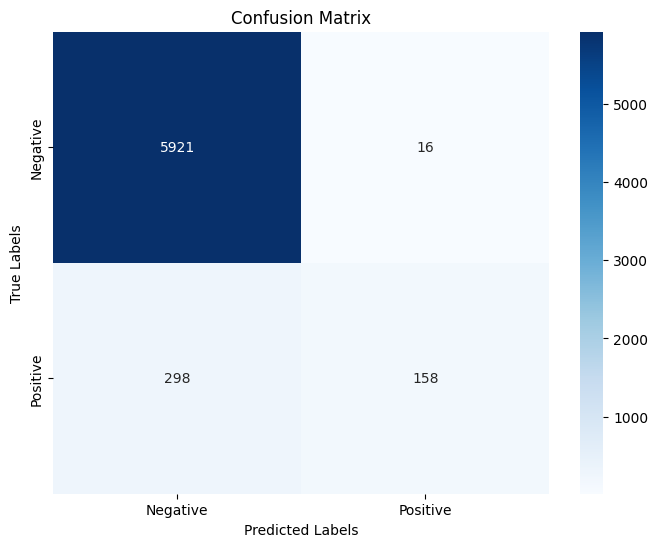

In [40]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**2. Classification Report Visualization**

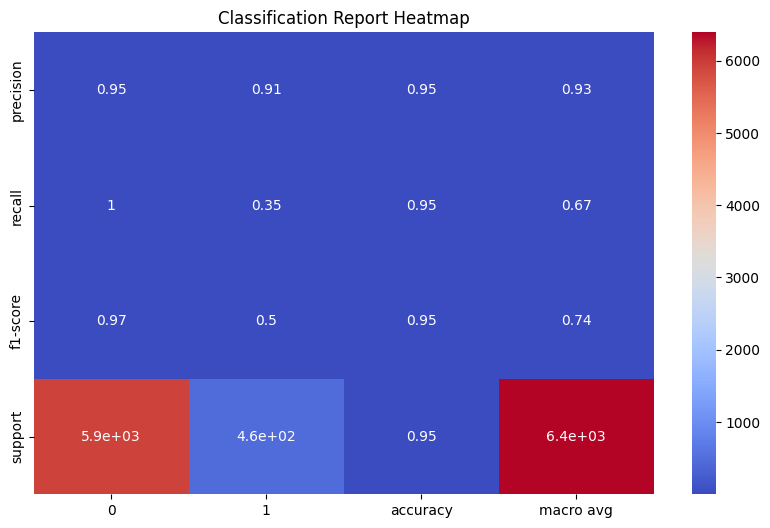

In [42]:
from sklearn.metrics import classification_report
import pandas as pd

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()

